In [36]:
import torch
from torch import nn
import numpy as np
from torchvision import datasets
import torchvision.transforms as ToTensor
import matplotlib.pyplot as plt

In [37]:
num_workers = 0
batch_size = 64

In [38]:
transform = transforms.ToTensor()

In [39]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [40]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [55]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [56]:
%matplotlib inline
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

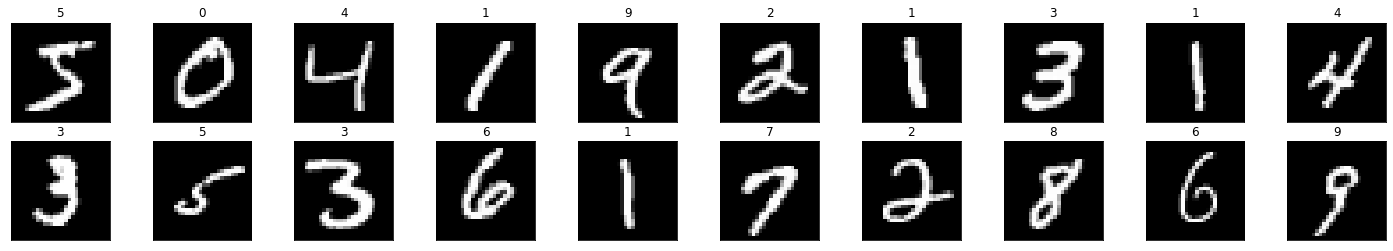

In [43]:
fig = plt.figure(figsize=(25, 4))
for image in np.arange(20):
    ax = fig.add_subplot(2, 10, image+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[image]), cmap='gray')
    ax.set_title(str(labels[image].item()))

In [44]:
img = np.squeeze(images[0])

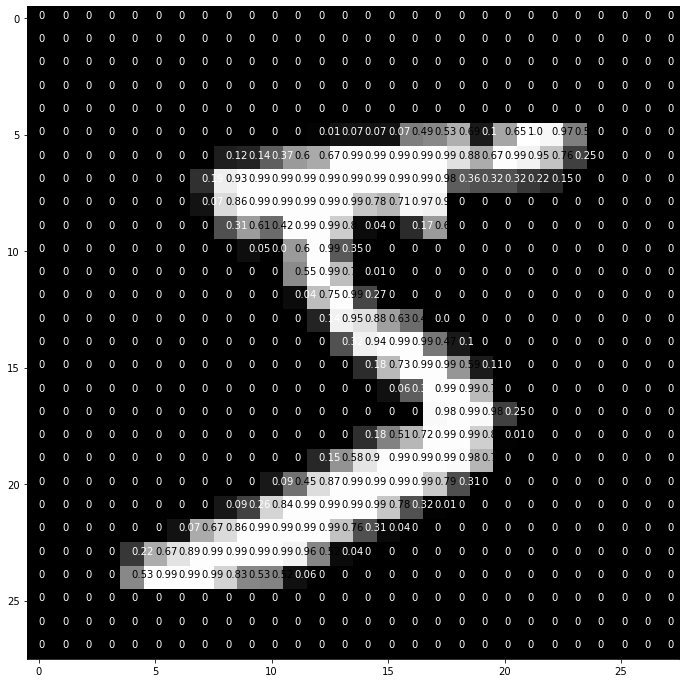

In [64]:
fig = plt.figure(figsize= (12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y], 2) if img[x][y] != 0 else 0
        ax.annotate(str(val), xy=(y, x),
                   color='white' if img[x][y] < thresh else 'black')
    

In [65]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [50]:
model = Network()
model

Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [52]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

In [75]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [76]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [77]:
epochs = 9
for epochs in range(epochs):
    print(f"Epoch {epochs+1}\n-------------------------------")
    train(train_loader, model, loss_fn,optimizer)
    test(test_loader, model, loss_fn)
print('Done!')

Epoch 1
-------------------------------
loss: 2.299966  [    0/60000]
loss: 2.285033  [ 6400/60000]
loss: 2.288373  [12800/60000]
loss: 2.251780  [19200/60000]
loss: 2.249233  [25600/60000]
loss: 2.232634  [32000/60000]
loss: 2.194417  [38400/60000]
loss: 2.210363  [44800/60000]
loss: 2.147720  [51200/60000]
loss: 2.103741  [57600/60000]
Test Error: 
 Accuracy: 64.2%, Avg loss: 2.089902 

Epoch 2
-------------------------------
loss: 2.078610  [    0/60000]
loss: 2.018064  [ 6400/60000]
loss: 2.038439  [12800/60000]
loss: 1.851768  [19200/60000]
loss: 1.851154  [25600/60000]
loss: 1.762210  [32000/60000]
loss: 1.610572  [38400/60000]
loss: 1.688051  [44800/60000]
loss: 1.465953  [51200/60000]
loss: 1.341745  [57600/60000]
Test Error: 
 Accuracy: 75.4%, Avg loss: 1.295370 

Epoch 3
-------------------------------
loss: 1.322334  [    0/60000]
loss: 1.157891  [ 6400/60000]
loss: 1.201196  [12800/60000]
loss: 0.994633  [19200/60000]
loss: 0.969222  [25600/60000]
loss: 0.905104  [32000/600